In [1]:
from mainIngModel import *
import numpy as np

In [2]:
data = loadLabelledData()
train_all, train_main = data['separated']['train']
test_pure_all, test_pure_main =  data['pure']['test']
train_pure_all, train_pure_main =  data['pure']['train']
ingNameArr = loadIngNameData()

In [12]:
pipeline = createPipeline(modelType='rf')
pipeline.fit(train_all, train_main)

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=10, n_jobs=-1))])

In [13]:
x = list(np.arange(0, 1, 0.05))
f1 = []
precision = []
recall = []
for k in x:
    f1Arr, precisionArr, recallArr = calcAccuracy(pipeline, train_main, test_pure_all, test_pure_main, k)
    # print(k)
    # print(np.mean(f1Arr))
    # print(np.mean(precisionArr))
    # print(np.mean(recallArr))
    f1.append(np.mean(f1Arr))
    precision.append(np.mean(precisionArr))
    recall.append(np.mean(recallArr))

In [4]:
print(list(map(np.mean,calcAccuracy(pipeline, train_main, train_pure_all, train_pure_main, 0.55))))
print(list(map(np.mean,calcAccuracy(pipeline, train_main, test_pure_all, test_pure_main, 0.55))))

ValueError: buffer source array is read-only

In [9]:
import matplotlib.pyplot as plt

In [89]:
print(x[np.argmax(f1)])
print(np.max(f1))

0.35000000000000003
0.47495451601919036


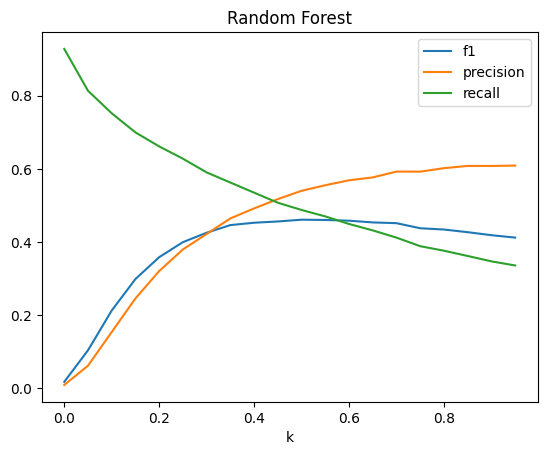

In [14]:
plt.plot(x, f1, label="f1")
plt.plot(x, precision, label="precision")
plt.plot(x, recall, label="recall")
plt.legend()
plt.title('Random Forest')
plt.xlabel('k')
plt.show()